# **Stock Market Clustering with K-Means**

In this notebook,we will see K-means Clustering been done on a group of companies imported from Yahoo Finance

In this notebook we're going to going to train a k-means clustering algorithm to group companies based on their stock market movements over a 2-year period.

**1. Imports & Data**

The data source we'll be using for the companies will be Yahoo Finance and we'll read in the data with pandas-datareader.

Before we import our data from Yahoo Finance let's import the initial packages we're going to need, and we'll import the machine learning libraries later on.

In [1]:
import pandas_datareader.data as web
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime

Next, we're going to define a dictionary with the companies that we're going to be clustering. We're going to use 28 companies across several industries.

Since this is a dictionary we're then going to pull out the company names with the sorted() function and pass in companies_dict.items() as well as an inline lambda function with index 1, which is the stock ticker.

In [2]:
# acquiring company stock infos  
companies_dict = {
 'Amazon': 'AMZN',
 'Apple': 'AAPL',
 'Walgreen': 'WBA',
 'Northrop Grumman': 'NOC',
 'Boeing': 'BA',
 'Lockheed Martin':'LMT',
 'McDonalds': 'MCD',
 'Intel': 'INTC',
 'Navistar': 'NAV',
 'IBM': 'IBM',
 'Texas Instruments': 'TXN',
 'MasterCard': 'MA',
 'Microsoft': 'MSFT',
 'General Electric': 'GE',
 'American Express': 'AXP',
 'Pepsi': 'PEP',
 'Coca Cola': 'KO',
 'Johnson & Johnson': 'JNJ',
 'Toyota': 'TM',
 'Honda': 'HMC',
 'Mitsubishi': 'MSBHY',
 'Sony': 'SNE',
 'Exxon': 'XOM',
 'Chevron': 'CVX',
 'Valero Energy': 'VLO',
 'Ford': 'F',
 'Bank of America': 'BAC'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

In [3]:
print(companies_dict.values())

dict_values(['AMZN', 'AAPL', 'WBA', 'NOC', 'BA', 'LMT', 'MCD', 'INTC', 'NAV', 'IBM', 'TXN', 'MA', 'MSFT', 'GE', 'AXP', 'PEP', 'KO', 'JNJ', 'TM', 'HMC', 'MSBHY', 'SNE', 'XOM', 'CVX', 'VLO', 'F', 'BAC'])


We now define the start date and end date as follows.

Then we're going to use web.DataReader() to load the companies we're interested in. In this case, we use companies_dict.values().

In [4]:
# Define which online source to use
data_source = 'yahoo'

# define start and end dates
start_date = '2017-01-01'
end_date = '2019-01-01'

# Use pandas_datareader.data.DataReader to load the desired data list(companies_dict.values()) used for python 3 compatibility
data = web.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

print(data.axes)

[DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None), MultiIndex([('Adj Close',  'AMZN'),
            ('Adj Close',  'AAPL'),
            ('Adj Close',   'WBA'),
            ('Adj Close',   'NOC'),
            ('Adj Close',    'BA'),
            ('Adj Close',   'LMT'),
            ('Adj Close',   'MCD'),
            ('Adj Close',  'INTC'),
            ('Adj Close',   'NAV'),
            ('Adj Close',   'IBM'),
            ...
            (   'Volume',   'JNJ'),
            (   'Volume',    'TM'),
            (   'Volume',   'HMC'),
            (   'Volume', 'MSBHY'),
            ( 

In [5]:
data.head()

Attributes   Adj Close                        ...     Volume                        
Symbols           AMZN       AAPL        WBA  ...        VLO           F         BAC
Date                                          ...                                   
2017-01-03  753.669983  27.548414  74.631035  ...  4425000.0  40510800.0  99298100.0
2017-01-04  757.179993  27.517582  74.649048  ...  7431000.0  77638100.0  76875100.0
2017-01-05  780.450012  27.657520  74.694016  ...  6450600.0  75628400.0  86826400.0
2017-01-06  795.989990  27.965857  74.757011  ...  3771700.0  40315900.0  66281500.0
2017-01-09  796.919983  28.222006  74.262199  ...  5132600.0  39438400.0  75901500.0

[5 rows x 162 columns]

In [6]:
stock_close=data['Close']
stock_open=data['Open']
print(stock_close.iloc[0])
print(stock_open.iloc[0])

Symbols
AMZN     753.669983
AAPL      29.037500
WBA       82.959999
NOC      234.889999
BA       156.970001
LMT      253.309998
MCD      119.620003
INTC      36.599998
NAV       31.840000
IBM      167.190002
TXN       73.580002
MA       105.389999
MSFT      62.580002
GE        30.471153
AXP       75.349998
PEP      104.650002
KO        41.799999
JNJ      115.839996
TM       118.550003
HMC       29.610001
MSBHY     42.669998
SNE       28.290001
XOM       90.889999
CVX      117.849998
VLO       70.419998
F         12.590000
BAC       22.530001
Name: 2017-01-03 00:00:00, dtype: float64
Symbols
AMZN     757.919983
AAPL      28.950001
WBA       83.099998
NOC      234.100006
BA       156.300003
LMT      251.199997
MCD      121.860001
INTC      36.610001
NAV       31.799999
IBM      167.000000
TXN       73.529999
MA       104.410004
MSFT      62.790001
GE        30.451923
AXP       74.889999
PEP      104.940002
KO        41.500000
JNJ      115.779999
TM       118.169998
HMC       29.480000
MS

Now let's move on to calculating the daily stock movements, since it's off of this movement that we want to cluster our data.

To do this we're first going to convert our stock_open and stock_close values to a numpy array. Also, since these values are currently a column vector for each day we're going to use .T to take the transpose of these and give us row vectors instead.

We're then going to create a movements dataset, and we'll start with a blank numpy array filled with 0's for now.

We're then going to write a for loop to assign the daily movement (stock_close - stock_open) for all the dates.

In [7]:
stock_close=np.array(stock_close).T
stock_open=np.array(stock_open).T

row,col=stock_close.shape
movements=np.zeros([row,col])

for i in range(0,row):
  movements[i,:]=np.subtract(stock_close[i,:],stock_open[i,:1])
  

In [8]:
for i in range(0,len(companies)):
  print('company:{},change:{}'.format(companies[i][0],sum(movements[i,:])))

company:Apple,change:274607.3586425781
company:Amazon,change:6777.282135009766
company:American Express,change:-4205.3492431640625
company:Boeing,change:27045.496520996094
company:Bank of America,change:62084.378677368164
company:Chevron,change:26949.44172668457
company:Ford,change:17846.559616088867
company:General Electric,change:3421.0397033691406
company:Honda,change:1610.2804203033447
company:IBM,change:-8154.089973449707
company:Intel,change:10890.480628967285
company:Johnson & Johnson,change:27670.788162231445
company:Coca Cola,change:11906.939632415771
company:Lockheed Martin,change:-5905.692452907562
company:MasterCard,change:8993.260307312012
company:McDonalds,change:3457.1088256835938
company:Mitsubishi,change:1696.2300186157227
company:Microsoft,change:7837.720603942871
company:Navistar,change:1564.1308822631836
company:Northrop Grumman,change:583.7802276611328
company:Pepsi,change:4260.590476989746
company:Sony,change:8151.299800872803
company:Toyota,change:-5035.741264343

# **Exploratory Data Analysis**


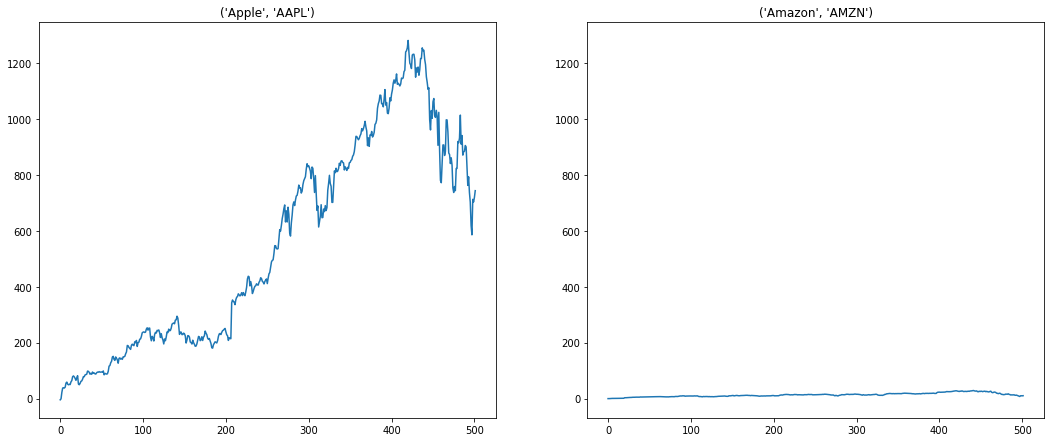

In [9]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

We can clearly see that the two stocks above have different scales between the price movements.

So its important to do Normalisation before we apply the clustering algorithm

In [10]:
# import Normalizer
from sklearn.preprocessing import Normalizer
# create the Normalizer
normalizer = Normalizer()

new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.10996262740117164
-0.12591151781994855
0.019644710209770558


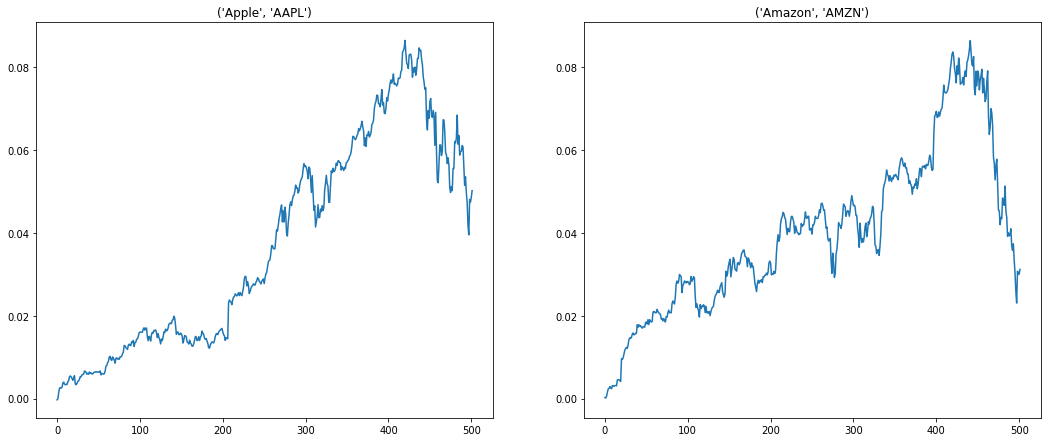

In [11]:
plt.figure(figsize=(18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222, sharey=ax1)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

After Normalisation it looks more even and fair

**K-Means Clustering**

There are many moving parts in a Machine Learning (ML) model that have to be tied together for an ML model to execute and produce results successfully. This process of tying together different pieces of the ML process is known as a pipeline. A pipeline is a generalized but very important concept for a Data Scientist

In [12]:
# import machine learning libraries
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# define normalizer
normalizer = Normalizer()

# create a K-means model with 10 clusters
kmeans = KMeans(n_clusters=10, max_iter=1000)

# make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

After we've compiled this let's fit the pipeline to the daily stock movements.



In [13]:
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=1000, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

Now we're going to actually predict the cluster labels.

So the question is: based off the movements, which cluster should we assign the company to?

To visualize this we'll create a DataFrame that aligns the labels to the companies and then print them out.

In [14]:
# predict cluster labels
labels = pipeline.predict(movements)

# create a DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# display df sorted by cluster labels
print(df.sort_values('labels'))


    labels                 companies
19       0   (Northrop Grumman, NOC)
0        1             (Apple, AAPL)
1        1            (Amazon, AMZN)
21       1               (Sony, SNE)
20       1              (Pepsi, PEP)
4        1    (Bank of America, BAC)
14       1          (MasterCard, MA)
12       1           (Coca Cola, KO)
11       1  (Johnson & Johnson, JNJ)
25       2           (Walgreen, WBA)
13       2    (Lockheed Martin, LMT)
9        2                (IBM, IBM)
23       3  (Texas Instruments, TXN)
6        4                 (Ford, F)
15       4          (McDonalds, MCD)
16       4       (Mitsubishi, MSBHY)
17       4         (Microsoft, MSFT)
8        5              (Honda, HMC)
22       6              (Toyota, TM)
2        7   (American Express, AXP)
7        8    (General Electric, GE)
5        8            (Chevron, CVX)
3        8              (Boeing, BA)
24       8      (Valero Energy, VLO)
10       8             (Intel, INTC)
26       8              (Exxon, XOM)
1

Principal Component Analysis (PCA) is a statistical procedure that uses an orthogonal transformation which converts a set of correlated variables to a set of uncorrelated variables. PCA is a most widely used tool in exploratory data analysis and in machine learning for predictive models.

Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique.

In [15]:
from sklearn.decomposition import PCA 

# visualize the results
reduced_data = PCA(n_components = 2).fit_transform(new)

# run kmeans on reduced data

kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# create DataFrame aligning labels & companies
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster labels
print(df.sort_values('labels'))

    labels                 companies
15       0          (McDonalds, MCD)
9        1                (IBM, IBM)
25       1           (Walgreen, WBA)
22       1              (Toyota, TM)
19       2   (Northrop Grumman, NOC)
8        2              (Honda, HMC)
18       2           (Navistar, NAV)
5        3            (Chevron, CVX)
4        3    (Bank of America, BAC)
11       3  (Johnson & Johnson, JNJ)
12       3           (Coca Cola, KO)
14       3          (MasterCard, MA)
1        3            (Amazon, AMZN)
21       3               (Sony, SNE)
0        3             (Apple, AAPL)
23       4  (Texas Instruments, TXN)
2        5   (American Express, AXP)
7        6    (General Electric, GE)
24       6      (Valero Energy, VLO)
13       7    (Lockheed Martin, LMT)
16       8       (Mitsubishi, MSBHY)
6        8                 (Ford, F)
17       8         (Microsoft, MSFT)
20       9              (Pepsi, PEP)
10       9             (Intel, INTC)
3        9              (Boeing, BA)
2

<Figure size 432x288 with 0 Axes>

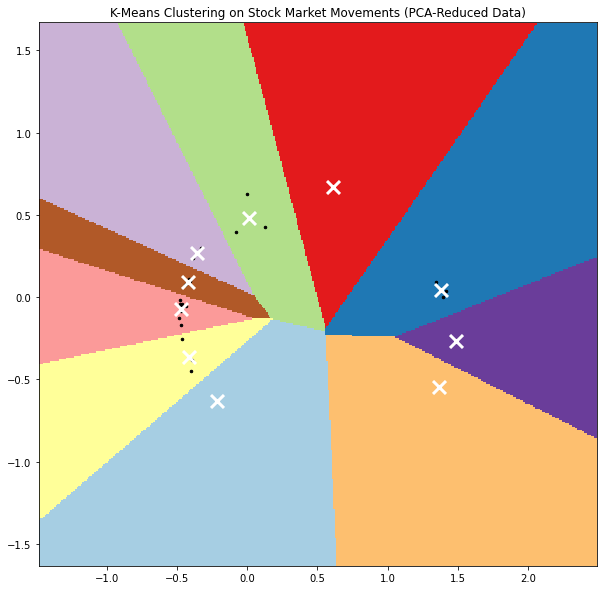

In [16]:
# Define step size of mesh
h = 0.01

# plot the decision boundary
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain abels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# define colorplot
cmap = plt.cm.Paired

# plot figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
 extent = (xx.min(), xx.max(), yy.min(), yy.max()),
 cmap = cmap,
 aspect = 'auto', origin='lower')
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)


# plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
 marker='x', s=169, linewidth=3,
 color='w', zorder=10)

plt.title('K-Means Clustering on Stock Market Movements (PCA-Reduced Data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()